# Step 1: Import helpful libraries
reference for this notebook :
Preprocess num data :

-https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

-https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


In [12]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from scipy import sparse
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectPercentile
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,Normalizer,QuantileTransformer,PowerTransformer
from sklearn.impute import SimpleImputer
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif
from sklearn.svm import SVR
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')


# Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [13]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [14]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [15]:
# Check the structure of the data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

# cat/num

In [16]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

# Numerical features distribution 

<Figure size 432x288 with 0 Axes>

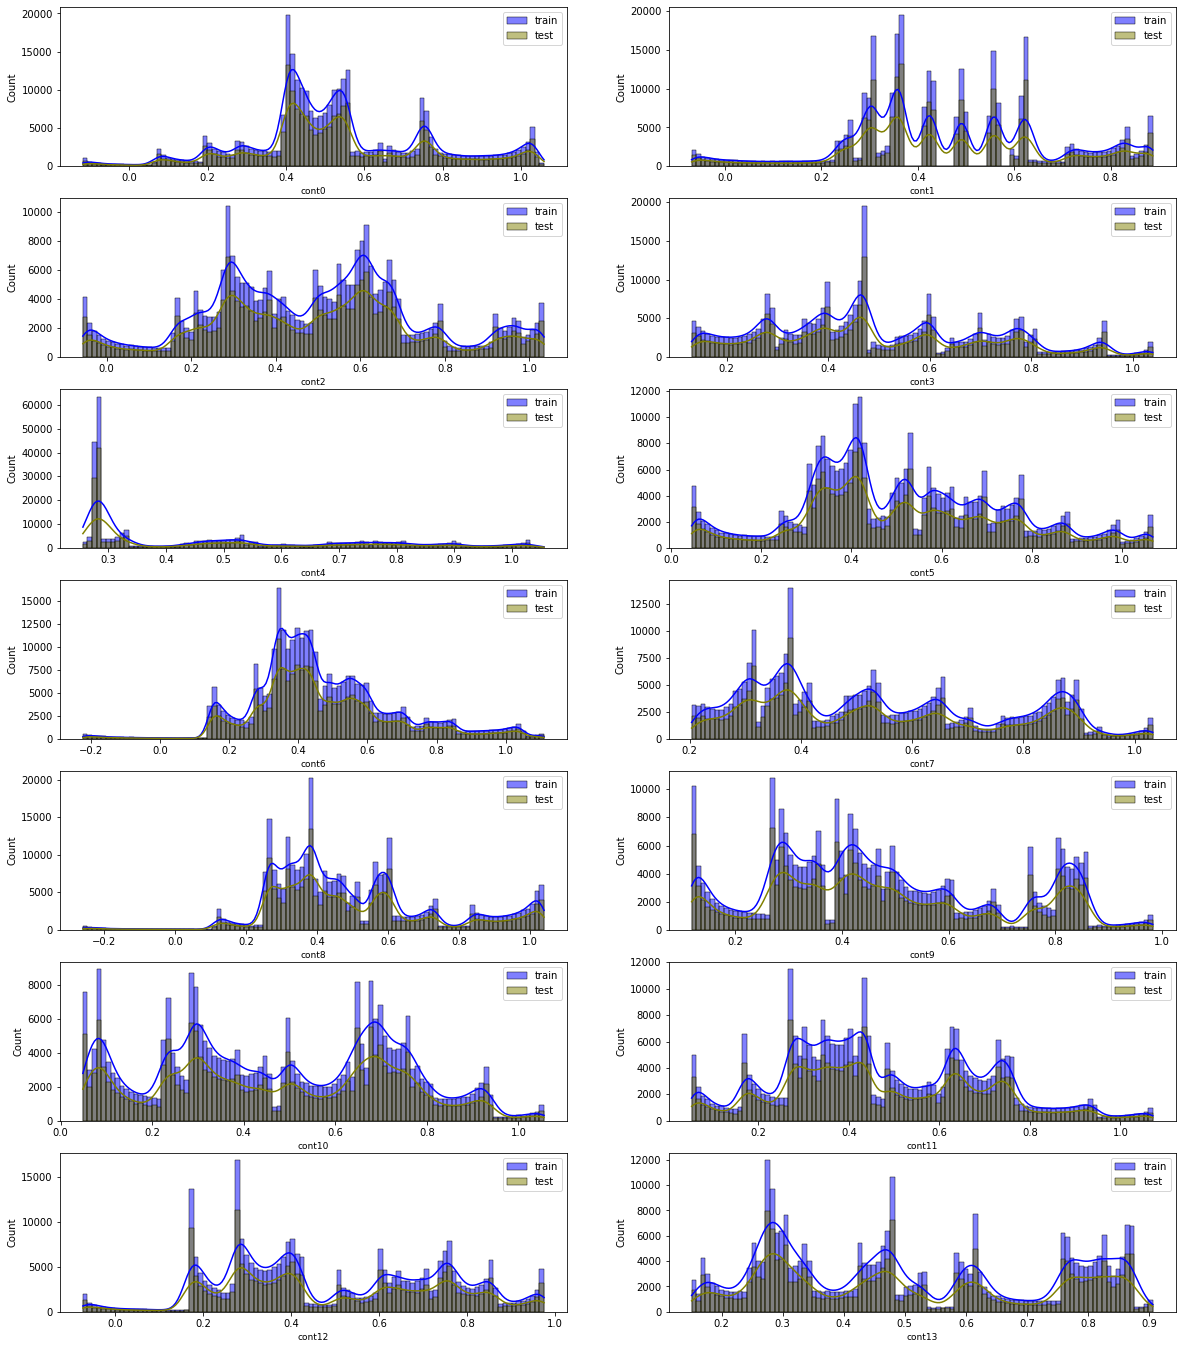

In [17]:
# Numerical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(7, 2,figsize=(20, 24))
for feature in num_columns:
    plt.subplot(7, 2,i)
    sns.histplot(train[feature],color="blue", kde=True,bins=100, label='train')
    sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

# Categorical features distribution 

<Figure size 432x288 with 0 Axes>

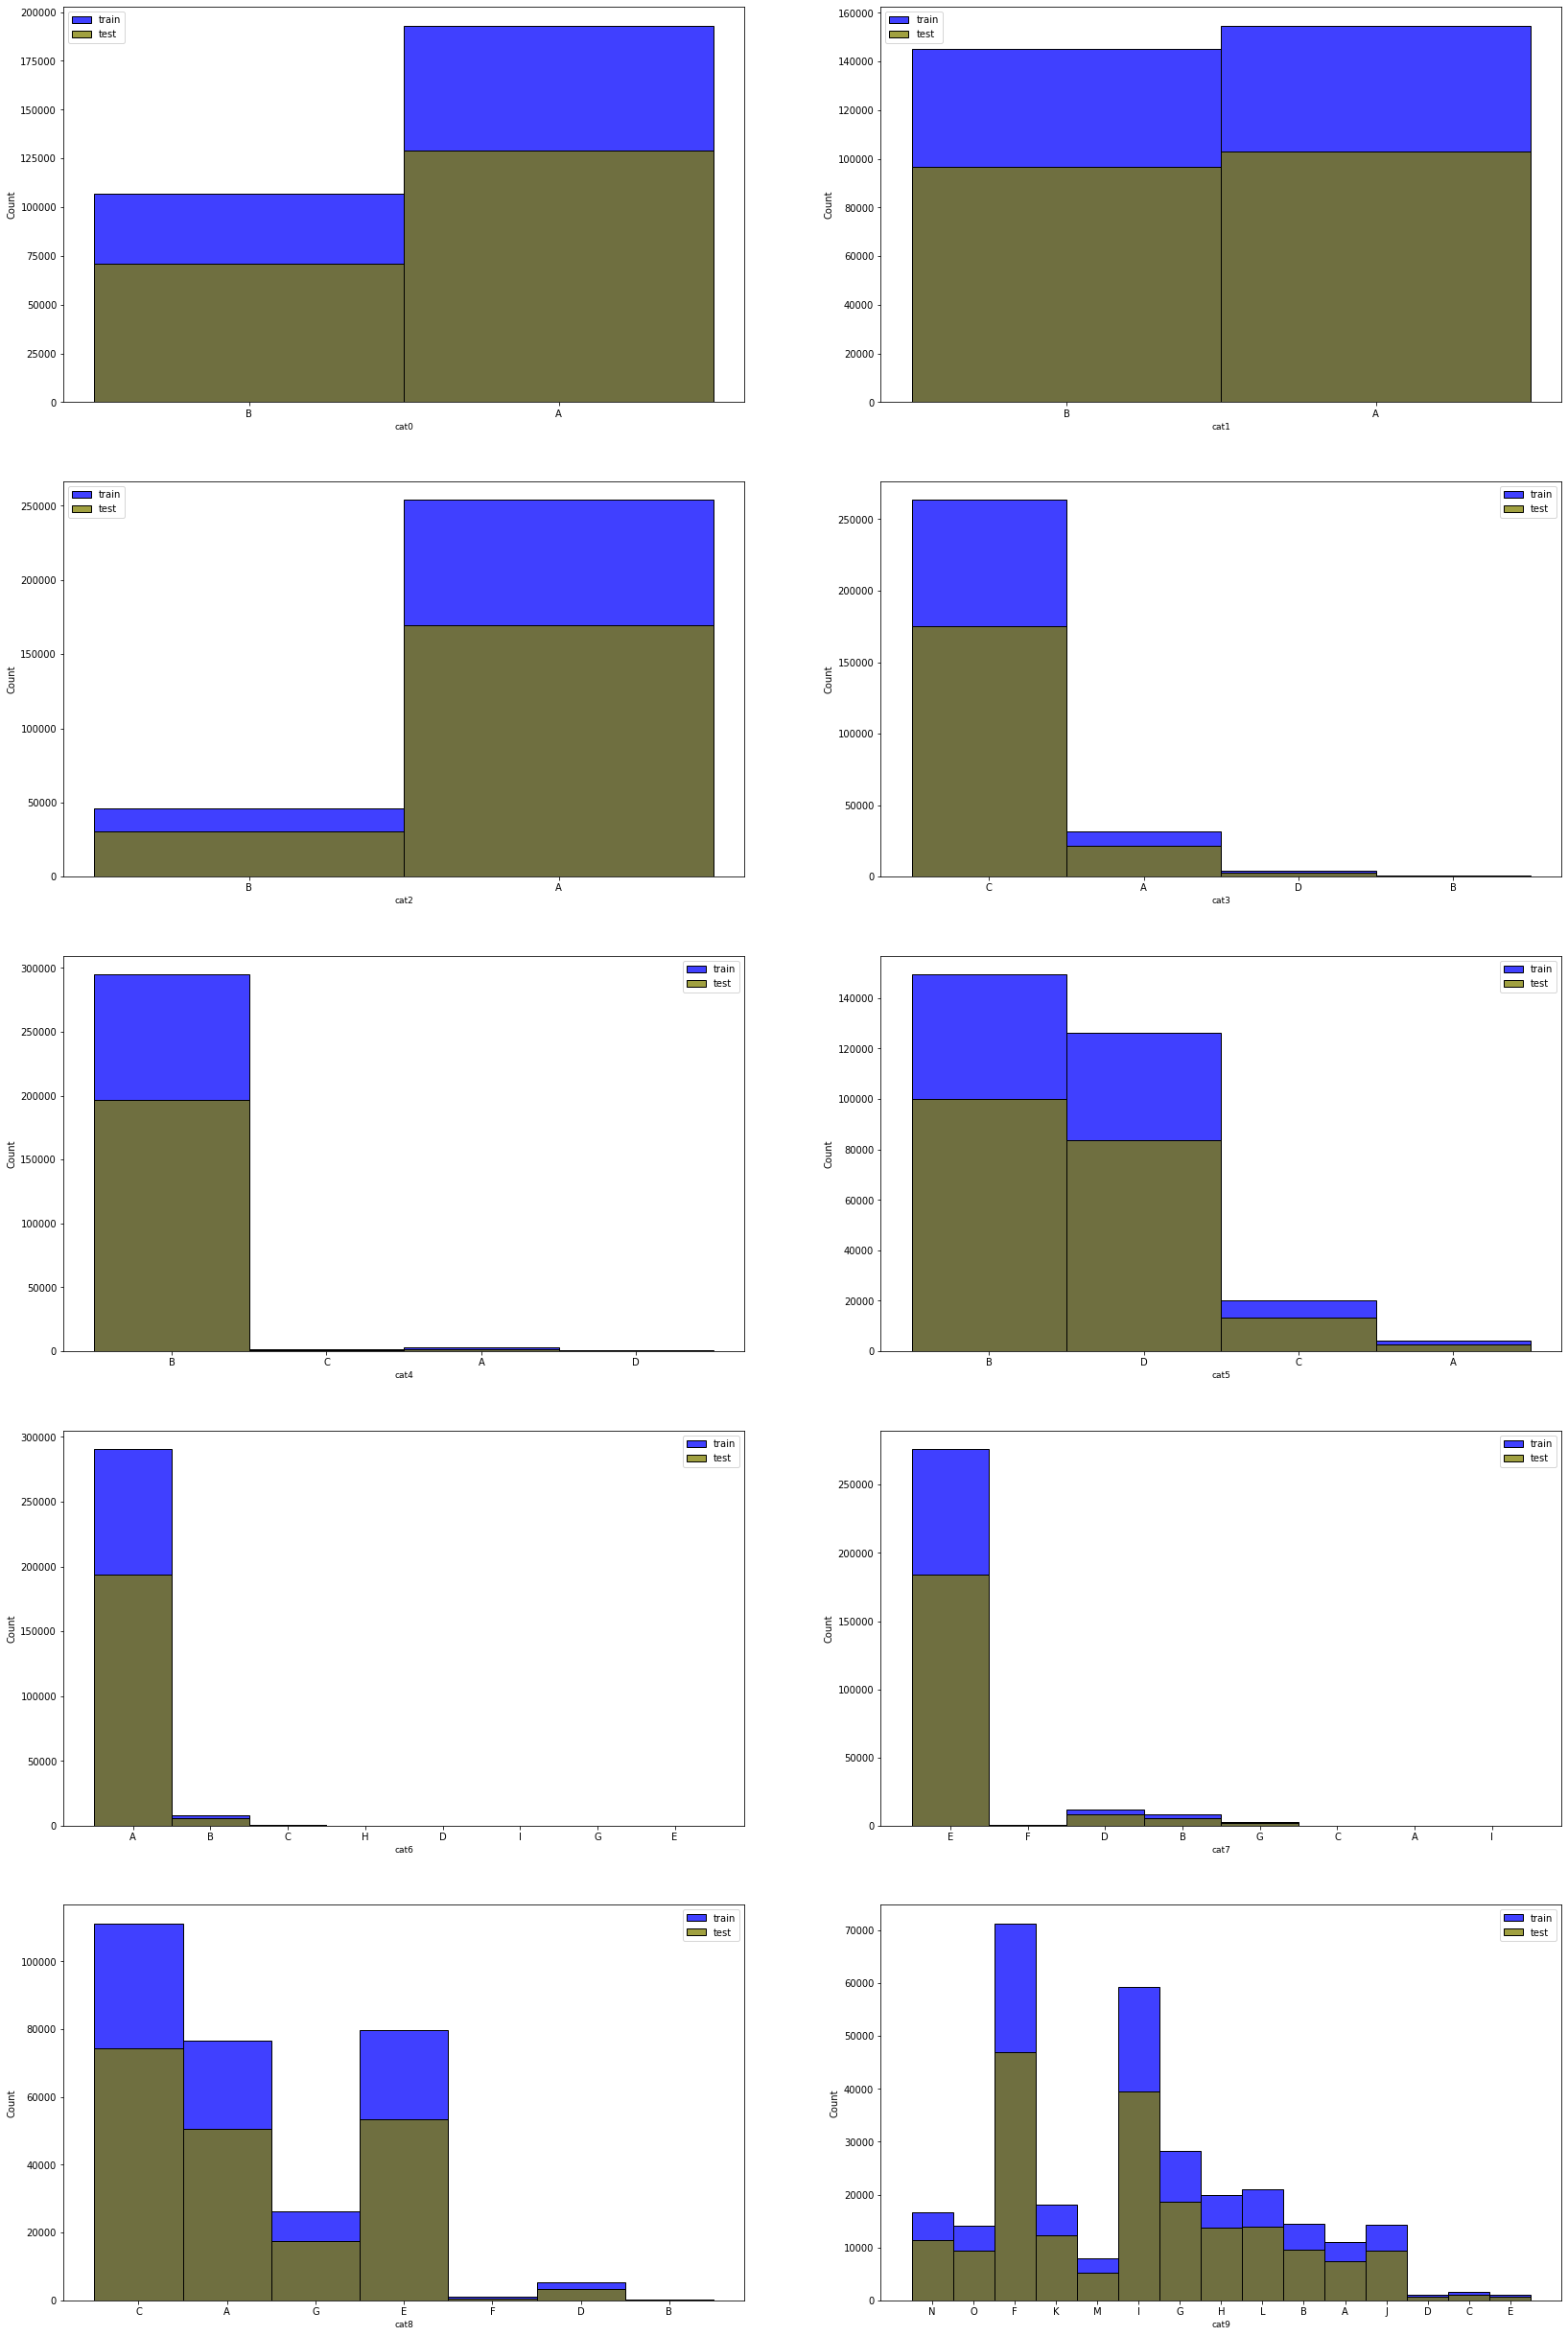

In [18]:
# Categorical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(5, 2,figsize=(28, 44))
for feature in cat_columns:
    plt.subplot(5, 2,i)
    sns.histplot(train[feature],color="blue", label='train')
    sns.histplot(test[feature],color="olive", label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

In [19]:
#Features correlation
corr =  train.drop(['id'], axis=1).select_dtypes(exclude=['int64','float64']).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Convert Dtypes : 

In [20]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      300000 non-null  int64   
 1   cat0    300000 non-null  category
 2   cat1    300000 non-null  category
 3   cat2    300000 non-null  category
 4   cat3    300000 non-null  category
 5   cat4    300000 non-null  category
 6   cat5    300000 non-null  category
 7   cat6    300000 non-null  category
 8   cat7    300000 non-null  category
 9   cat8    300000 non-null  category
 10  cat9    300000 non-null  category
 11  cont0   300000 non-null  float64 
 12  cont1   300000 non-null  float64 
 13  cont2   300000 non-null  float64 
 14  cont3   300000 non-null  float64 
 15  cont4   300000 non-null  float64 
 16  cont5   300000 non-null  float64 
 17  cont6   300000 non-null  float64 
 18  cont7   300000 non-null  float64 
 19  cont8   300000 non-null  float64 
 20  cont9   300000 non-null  f

# Target 

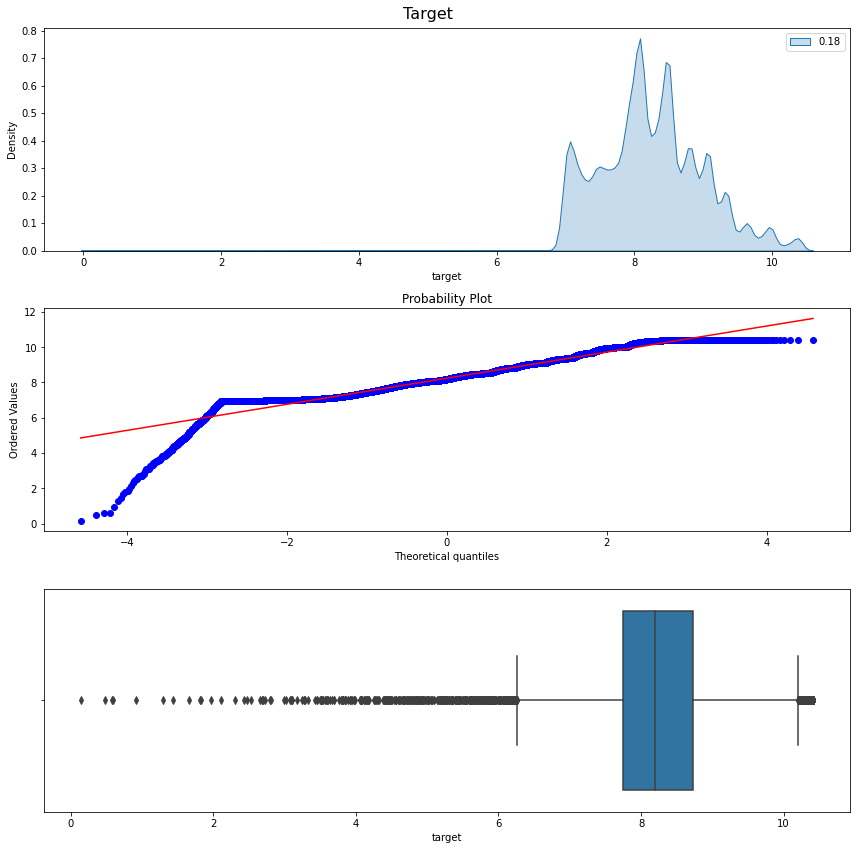

In [22]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

f.suptitle('Target', fontsize=16)
g = sns.kdeplot(train['target'], shade=True, label="%.2f"%(train['target'].skew()), ax=axes[0])
g = g.legend(loc="best")
stats.probplot(train['target'], plot=axes[1])
sns.boxplot(x='target', data=train, orient='h', ax=axes[2]);

plt.tight_layout()
plt.show()

# Define the model features and target
## Extract X and y 

In [23]:
# Create arrays for the features and the response variable
y = train['target'].to_numpy()
X = train.drop(['id','target'], axis=1)

# Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [24]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

90000 rows in test set vs. 210000 in training set. 24 Features.


# What should we do for each colmun
## Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
## Cat Features 

In [25]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns


## Num Features 

In [26]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [27]:
print(cat_columns)
print(num_columns)

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9'],
      dtype='object')
Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')


# check that we have all column

In [28]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(all_columns)

['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


In [29]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

Ok


# Create complexe transformer  in order to  put all transformations in the same pipe 
    'num_columns' :Cleaning->Valeur Manquante -> Standar_Scaler
    'cat_columns' : Cleaning -> Valeur Manquante -> Categorique [One Hot]


    fill_missing_then_Standar_scaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
        StandardScaler()
    )

    "Write a pattern to extract numbers and decimals"
    def return_number(string):
        pattern = re.compile(r"\d+\.\d+")
        # Search the text for matches
        number = re.match(pattern, string)
        # If a value is returned, use group(0) to return the found value
        if number is not None:
            return float(number.group(0))

    extraire_number_then_imput_then_scale = make_pipeline(
        FunctionTransformer(extract_number),
        fill_missing_then_Standar_scaler,
    )    


list to drop ['cat0', 'cat2', 'cont1', 'cat4'] +

In [30]:
# !nvidia-smi

/bin/bash: nvidia-smi: command not found


## Sparse interation 

In [31]:
class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)
# Outlier Handle 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal) 

In [32]:
cross_validation_design = KFold(n_splits=3,
                                shuffle=True,
                                random_state=77)

cross_validation_design

KFold(n_splits=3, random_state=77, shuffle=True)

# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'BaseNEncoder': ce.basen.BaseNEncoder,
    'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    'HashingEncoder': ce.hashing.HashingEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder,
    'WOEEncoder': ce.woe.WOEEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    #'MinMaxScaler': MinMaxScaler,
    #'PowerTransformer': PowerTransformer,
    #'QuantileTransformer': QuantileTransformer,
    'Normalizer': Normalizer,
    'MaxAbsScaler': MaxAbsScaler
}
# SelectBest features 
BestfeaturesPercentile={#'50features': 50,
                        #'75features': 75,
                       '100features': 100}
#X1=X[0:10].copy()
#y1=y[0:10].copy()
df_resultsLGBMReg = pd.DataFrame(columns=['encoder', 'scaler', 'Percentnumoffeatures', 'rmse'])
for num in BestfeaturesPercentile:
    for scaler in Scalers:
        for key in encoders:
            try :

                categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder', encoders[key]()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    

                numeric_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', Scalers[scaler]()),#(Numerical Input, Numerical Output)
                        ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )

                preprocessor = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer, num_columns),
                        ('categorical', categorical_transformer, cat_columns)
                    ]
                )

                pipe_LGBMReg = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', lgbm.LGBMRegressor( n_jobs=-1,verbose=-1,device='gpu'))
                    ]
                )
                #rmse =cross_val_score(pipe_LGBMReg, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
                pipe_LGBMReg.fit(X_train, y_train)
                y_pred = pipe_LGBMReg.predict(X_test)
                rmse=mean_squared_error(y_test, y_pred,squared=False)
                row = {
                    'encoder': key,
                    'scaler': scaler,
                    'Percentnumoffeatures': num,
                    'rmse': rmse
                }
                df_resultsLGBMReg = df_resultsLGBMReg.append(row, ignore_index=True)
                df_resultsLGBMReg.to_csv('firstmodellgbm3.csv',index=False)               
                print(row)
            except :
                row={
                    'encoder': key,
                    'scaler': scaler,
                    'Percentnumoffeatures': num,
                    'rmse': np.nan
                }
                df_resultsLGBMReg = df_resultsLGBMReg.append(row, ignore_index=True)

In [33]:
#df_resultsLGBMReg.sort_values(by='rmse').head(50)

encoder 	scaler 	Percentnumoffeatures 	rmse
106 	BaseNEncoder 	StandardScaler 	75features 	0.729921
107 	BinaryEncoder 	StandardScaler 	75features 	0.729921
116 	PolynomialEncoder 	StandardScaler 	75features 	0.730070
129 	MEstimateEncoder 	RobustScaler 	75features 	0.730111
133 	TargetEncoder 	RobustScaler 	75features 	0.730111
105 	BackwardDifferenceEncoder 	StandardScaler 	75features 	0.730145
126 	JamesSteinEncoder 	RobustScaler 	75features 	0.730209
115 	OrdinalEncoder 	StandardScaler 	75features 	0.730222
117 	SumEncoder 	StandardScaler 	75features 	0.730223
131 	PolynomialEncoder 	RobustScaler 	75features 	0.730237
132 	SumEncoder 	RobustScaler 	75features 	0.730247
130 	OrdinalEncoder 	RobustScaler 	75features 	0.730255
125 	HelmertEncoder 	RobustScaler 	75features 	0.730269
127 	OneHotEncoder 	RobustScaler 	75features 	0.730279
110 	HelmertEncoder 	StandardScaler 	75features 	0.730286
120 	BackwardDifferenceEncoder 	RobustScaler 	75features 	0.730289
112 	OneHotEncoder 	StandardScaler 	75features 	0.730307
111 	JamesSteinEncoder 	StandardScaler 	75features 	0.730354
108 	CatBoostEncoder 	StandardScaler 	75features 	0.730408
123 	CatBoostEncoder 	RobustScaler 	75features 	0.730409
122 	BinaryEncoder 	RobustScaler 	75features 	0.730466
121 	BaseNEncoder 	RobustScaler 	75features 	0.730466
118 	TargetEncoder 	StandardScaler 	75features 	0.730555
114 	MEstimateEncoder 	StandardScaler 	75features 	0.730555
109 	HashingEncoder 	StandardScaler 	75features 	0.731231
66 	JamesSteinEncoder 	PowerTransformer 	50features 	0.731326
72 	SumEncoder 	PowerTransformer 	50features 	0.731375
65 	HelmertEncoder 	PowerTransformer 	50features 	0.731457
124 	HashingEncoder 	RobustScaler 	75features 	0.731478
27 	SumEncoder 	RobustScaler 	50features 	0.731482
0 	BackwardDifferenceEncoder 	StandardScaler 	50features 	0.731484
12 	SumEncoder 	StandardScaler 	50features 	0.731498
77 	BinaryEncoder 	QuantileTransformer 	50features 	0.731503
7 	OneHotEncoder 	StandardScaler 	50features 	0.731508
13 	TargetEncoder 	StandardScaler 	50features 	0.731509
9 	MEstimateEncoder 	StandardScaler 	50features 	0.731509
41 	PolynomialEncoder 	MinMaxScaler 	50features 	0.731542
6 	JamesSteinEncoder 	StandardScaler 	50features 	0.731548
1 	BaseNEncoder 	StandardScaler 	50features 	0.731548
2 	BinaryEncoder 	StandardScaler 	50features 	0.731548
45 	BackwardDifferenceEncoder 	MaxAbsScaler 	50features 	0.731549
42 	SumEncoder 	MinMaxScaler 	50features 	0.731557
69 	MEstimateEncoder 	PowerTransformer 	50features 	0.731564
73 	TargetEncoder 	PowerTransformer 	50features 	0.731564
88 	TargetEncoder 	QuantileTransformer 	50features 	0.731568
81 	JamesSteinEncoder 	QuantileTransformer 	50features 	0.731578
61 	BaseNEncoder 	PowerTransformer 	50features 	0.731578
62 	BinaryEncoder 	PowerTransformer 	50features 	0.731578
30 	BackwardDifferenceEncoder 	MinMaxScaler 	50features 	0.731579
32 	BinaryEncoder 	MinMaxScaler 	50features 	0.731581

In [34]:
import pandas as pd 
#data=pd.read_csv('./firstmodellgbm2.csv')
#data.sort_values(by='rmse').head(50)

In [35]:
#df_resultsLGBMReg.to_csv('firstmodellgbm3.csv',index=False)

# Final Pipe 

# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    #'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    #'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    'MaxAbsScaler': MaxAbsScaler
}
# SelectBest features 
BestfeaturesPercentile={#'75features': 75,
                        '100features': 100}
#X1=X[0:10].copy()
#y1=y[0:10].copy()
df_resultsLGBMReg = pd.DataFrame(columns=['encoder', 'scaler', 'Percentnumoffeatures', 'rmse'])
for num in BestfeaturesPercentile:
    for scaler in Scalers:
        for key in encoders:
            try :

                categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder', encoders[key]()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    

                numeric_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', Scalers[scaler]()),#(Numerical Input, Numerical Output)
                        ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )

                preprocessor = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer, num_columns),
                        ('categorical', categorical_transformer, cat_columns)
                    ]
                )

                pipe_LGBMReg = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', lgbm.LGBMRegressor( n_jobs=-1,verbose=-1,device='gpu'))
                    ]
                )
                rmse =cross_val_score(pipe_LGBMReg, X_train, y_train, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
                #pipe_LGBMReg.fit(X_train, y_train)
                #y_pred = pipe_LGBMReg.predict(X_test)
                #rmse=mean_squared_error(y_test, y_pred,squared=False)
                row = {
                    'encoder': key,
                    'scaler': scaler,
                    'Percentnumoffeatures': num,
                    'rmse': -rmse
                }
                df_resultsLGBMReg = df_resultsLGBMReg.append(row, ignore_index=True)
                df_resultsLGBMReg.to_csv('firstmodellgbm4.csv',index=False)               
                print(row)
            except :
                row={
                    'encoder': key,
                    'scaler': scaler,
                    'Percentnumoffeatures': num,
                    'rmse': np.nan
                }
                df_resultsLGBMReg = df_resultsLGBMReg.append(row, ignore_index=True)

# Pipe 1

In [36]:
# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    'MaxAbsScaler': MaxAbsScaler
}
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder', ce.james_stein.JamesSteinEncoder()),#(Numerical Input, Categorical Output)
                         #('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    
numeric_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', StandardScaler()),#(Numerical Input, Numerical Output)
                       # ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer, num_columns),
                        ('categorical', categorical_transformer, cat_columns)
                    ]
                )

pipe_LGBMReg = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', lgbm.LGBMRegressor( n_jobs=-1,verbose=-1,device='gpu'))
                    ]
                )
#rmse =cross_val_score(pipe_LGBMReg, X_train, y_train, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#pipe_LGBMReg5.fit(X, y)
#y_pred = pipe_LGBMReg5.predict(X_test)
#rmse5=mean_squared_error(y_test, y_pred,squared=False)
#rmse5

# PiPe2 

In [37]:
# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    'MaxAbsScaler': MaxAbsScaler
}
categorical_transformer2 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder', ce.m_estimate.MEstimateEncoder()),#(Numerical Input, Categorical Output)
                         #('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    
numeric_transformer2 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', StandardScaler()),#(Numerical Input, Numerical Output)
                       # ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )
preprocessor2 = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer2, num_columns),
                        ('categorical', categorical_transformer2, cat_columns)
                    ]
                )

pipe_LGBMReg2 = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor2),
                        ('classifier', lgbm.LGBMRegressor( n_jobs=-1,verbose=-1,device='gpu'))
                    ]
                )
#rmse =cross_val_score(pipe_LGBMReg, X_train, y_train, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#pipe_LGBMReg5.fit(X, y)
#y_pred = pipe_LGBMReg5.predict(X_test)
#rmse5=mean_squared_error(y_test, y_pred,squared=False)
#rmse5

# Pipe3

In [38]:
# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    'MaxAbsScaler': MaxAbsScaler
}
categorical_transformer3 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder', ce.target_encoder.TargetEncoder()),#(Numerical Input, Categorical Output)
                         #('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    
numeric_transformer3 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', StandardScaler()),#(Numerical Input, Numerical Output)
                       # ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )
preprocessor3 = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer3, num_columns),
                        ('categorical', categorical_transformer3, cat_columns)
                    ]
                )

pipe_LGBMReg3 = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor3),
                        ('classifier', lgbm.LGBMRegressor( n_jobs=-1,verbose=-1,device='gpu'))
                    ]
                )
#rmse =cross_val_score(pipe_LGBMReg, X_train, y_train, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#rmse =cross_val_score(pipe_LGBMReg, X_train, y_train, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#pipe_LGBMReg5.fit(X, y)
#y_pred = pipe_LGBMReg5.predict(X_test)
#rmse5=mean_squared_error(y_test, y_pred,squared=False)
#rmse5

# Pipe4 

In [39]:
# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    'MaxAbsScaler': MaxAbsScaler
}
categorical_transformer4 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder', ce.one_hot.OneHotEncoder()),#(Numerical Input, Categorical Output)
                         #('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    
numeric_transformer4 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                       # ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )
preprocessor4 = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer4, num_columns),
                        ('categorical', categorical_transformer4, cat_columns)
                    ]
                )

pipe_LGBMReg4 = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor4),
                        ('classifier', lgbm.LGBMRegressor( n_jobs=-1,verbose=-1,device='gpu'))
                    ]
                )
#rmse =cross_val_score(pipe_LGBMReg, X_train, y_train, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#rmse =cross_val_score(pipe_LGBMReg, X_train, y_train, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#pipe_LGBMReg5.fit(X, y)
#y_pred = pipe_LGBMReg5.predict(X_test)
#rmse5=mean_squared_error(y_test, y_pred,squared=False)
#rmse5

# Pipe5

In [40]:
# Different Encoders 
encoders = {
    'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    'HelmertEncoder': ce.helmert.HelmertEncoder,
    'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder
}
# Differents Scaler
Scalers={'StandardScaler': StandardScaler,
    'RobustScaler': RobustScaler,
    'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    'MaxAbsScaler': MaxAbsScaler
}
categorical_transformer5 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder',ce.helmert.HelmertEncoder()),#(Numerical Input, Categorical Output)
                         #('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    
numeric_transformer5 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', QuantileTransformer()),#(Numerical Input, Numerical Output)
                       # ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )
preprocessor5 = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer5, num_columns),
                        ('categorical', categorical_transformer5, cat_columns)
                    ]
                )

pipe_LGBMReg5 = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor5),
                        ('classifier', lgbm.LGBMRegressor( n_jobs=-1,verbose=-1,device='gpu'))
                    ]
                )
#rmse =cross_val_score(pipe_LGBMReg, X_train, y_train, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
#pipe_LGBMReg5.fit(X, y)
#y_pred = pipe_LGBMReg5.predict(X_test)
#rmse5=mean_squared_error(y_test, y_pred,squared=False)
#rmse5

1.What is ensembling?

In general, ensembling is a technique of combining two or more algorithms of similar or dissimilar types called base learners. This is done to make a more robust system which incorporates the predictions from all the base learners. It can be understood as conference room meeting between multiple traders to make a decision on whether the price of a stock will go up or not.

Since all of them have a different understanding of the stock market and thus a different mapping function from the problem statement to the desired outcome. Therefore, they are supposed to make varied predictions on the stock price based on their own understandings of the market.

Now we can take all of these predictions into account while making the final decision. This will make our final decision more robust, accurate and less likely to be biased. The final decision would have been opposite if one of these traders would have made this decision alone.

You can consider another example of a candidate going through multiple rounds of job interviews. The final decision of candidate’s ability is generally taken based on the feedback of all the interviewers. Although a single interviewer might not be able to test the candidate for each required skill and trait. But the combined feedback of multiple interviewers usually helps in better assessment of the candidate.

 
2. Types of ensembling

Some of the basic concepts which you should be aware of before we go into further detail are:

    Averaging: It’s defined as taking the average of predictions from models in case of regression problem or while predicting probabilities for the classification problem.
    Majority vote: It’s defined as taking the prediction with maximum vote / recommendation from multiple models predictions while predicting the outcomes of a classification problem.
    Weighted average: In this, different weights are applied to predictions from multiple models then taking the average which means giving high or low importance to specific model output.


## Boosting:
Boosting is a sequential technique in which, the first algorithm is trained on the entire dataset and the subsequent algorithms are built by fitting the residuals of the first algorithm, thus giving higher weight to those observations that were poorly predicted by the previous model.

It relies on creating a series of weak learners each of which might not be good for the entire dataset but is good for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

It’s really important to note that boosting is focused on reducing the bias. This makes the boosting algorithms prone to overfitting. Thus, parameter tuning becomes a crucial part of boosting algorithms to make them avoid overfitting.

Some examples of boosting are XGBoost, GBM, ADABOOST, etc.

## Stacking:

In stacking multiple layers of machine learning models are placed one over another where each of the models passes their predictions to the model in the layer above it and the top layer model takes decisions based on the outputs of the models in layers below i 

Practically speaking, there can be a countless number of ways in which you can ensemble different models. But these are some techniques that are mostly used:

    Bagging: Bagging is also referred to as bootstrap aggregation. To understand bagging, we first need to understand bootstrapping. Bootstrapping is a sampling technique in which we choose ‘n’ observations or rows out of the original dataset of ‘n’ rows as well. But the key is that each row is selected with replacement from the original dataset so that each row is equally likely to be selected in each iteration. 
# Model Stacking

Improve your Predictive Model’s Score using a Stacking Regressor

  “The whole is greater than the sum of its parts.” – Aristotle

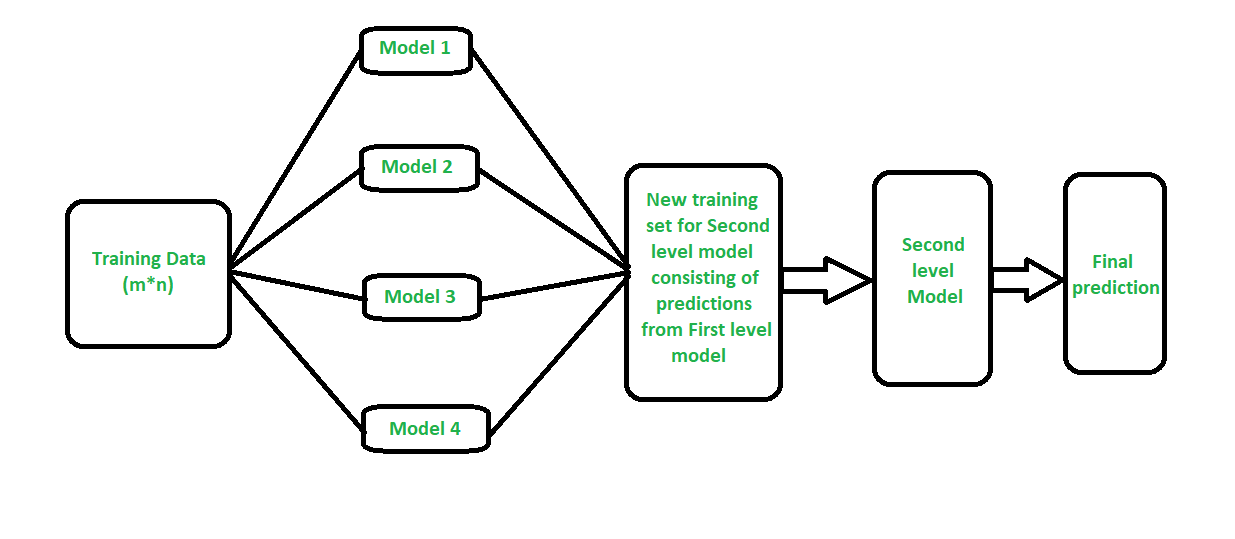

Stacking is a way to ensemble multiple classifications or regression model. There are many ways to ensemble models, the widely known models are Bagging or Boosting. Bagging allows multiple similar models with high variance are averaged to decrease variance. Boosting builds multiple incremental models to decrease the bias, while keeping variance small.

Stacking (sometimes called Stacked Generalization) is a different paradigm. The point of stacking is to explore a space of different models for the same problem. The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. So, you can build multiple different learners and you use them to build an intermediate prediction, one prediction for each learned model. Then you add a new model which learns from the intermediate predictions the same target.
This final model is said to be stacked on the top of the others, hence the name. Thus, you might improve your overall performance, and often you end up with a model which is better than any individual intermediate model. Notice however, that it does not give you any guarantee, as is often the case with any machine learning technique.
# How stacking works?

    We split the training data into K-folds just like K-fold cross-validation.
    A base model is fitted on the K-1 parts and predictions are made for Kth part.
    We do for each part of the training data.
    The base model is then fitted on the whole train data set to calculate its performance on the test set.
    We repeat the last 3 steps for other base models.
    Predictions from the train set are used as features for the second level model.
    Second level model is used to make a prediction on the test set.
    
  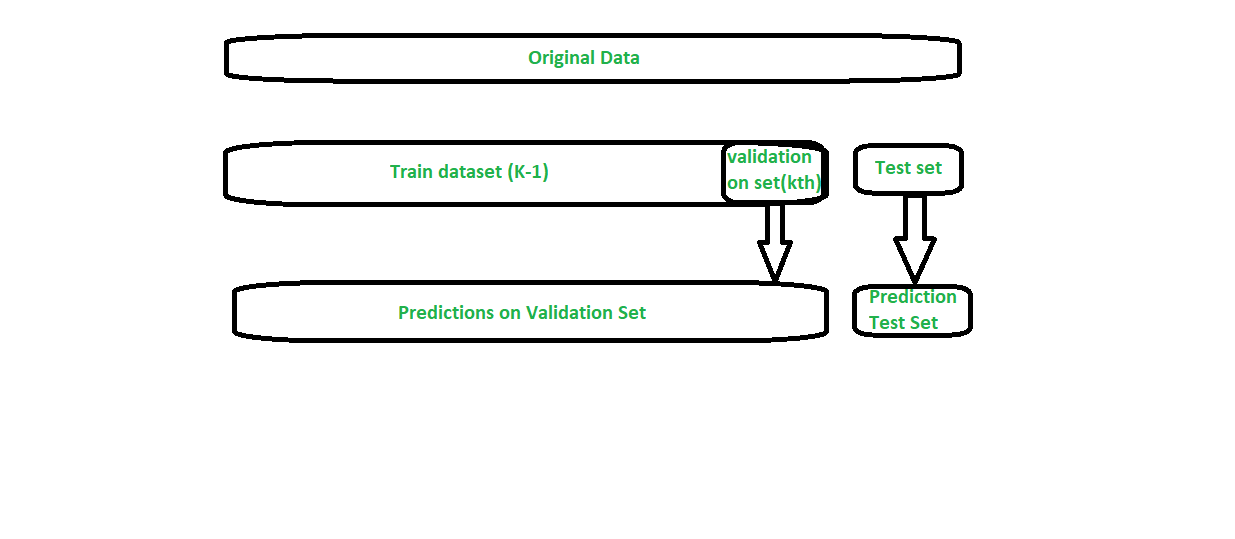
## Type 1: Simplest Stacking Regressor approach: Averaging Base models

We begin with this simple approach of averaging base models. Build a new class to extend scikit-learn with our model and also to leverage encapsulation and code reuse.
Averaged base models class

In [41]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [42]:
#rmse =cross_val_s
#ENet = ElasticNet()

model_xgb = XGBRegressor(n_estimators = 2000,learning_rate = 0.03,
                    random_state = 22, 
                         #tree_method = 'gpu_hist', 
                         reg_alpha = 10)
Catmodel = CatBoostRegressor(iterations=6800,
                          learning_rate=0.93,
                          loss_function="RMSE",
                          random_state=42,
                          verbose=0,
                          thread_count=4,
                          depth=1,
                         # task_type="GPU",
                          l2_leaf_reg=3.28,
                         )
seed = np.random.randint(1, 1e5)
lgbm_params = {
        "random_state": 2021,
        "metric": "rmse",
        "reg_lambda": 0.01,
        "colsample_bytree": 0.33,
        "learning_rate": 0.005,
        "max_depth": 65,
        "num_leaves": 250,
        "min_child_samples": 100,
        "n_estimators": 2000,
        "cat_smooth": 50,
        "min_data_per_group": 117,
        "cat_l2": 7.5586732660804445
       # 'device': 'gpu',
        #'gpu_platform_id': 0,
        #'gpu_device_id': 0
}
              
# Transferring the best parameters to our basic regressor
lgbmreg = lgbm.LGBMRegressor(boosting_type='gbdt',
                        n_jobs=-1, 
                        verbose=-1,
                         **lgbm_params)
averaged_models = AveragingModels(models = (lgbmreg,Catmodel,model_xgb))
averaged_models_pipe = Pipeline([('data_cleaning', preprocessor4),
                        ('Stack_reg1', averaged_models)
                        ])

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(averaged_models_pipe,X_train, y_train, scoring="neg_mean_squared_error", cv = cross_validation_design))
    return(rmse)
def r2_cv(model):
    rmse= np.sqrt(-cross_val_score(averaged_models_pipe,X_train, y_train, scoring="r2", cv = cross_validation_design))
    return(rmse)
#score = rmse_cv(averaged_models)
#r2_score = r2_cv(averaged_models)
#print(" Averaged RMSE base models score: {:.4f}".format(score.mean()))
#print(" Averaged R2 base models score: {:.4f}".format(r2_score.mean()))

In [43]:
#averaged_models_pipe.fit(X,y)

In [44]:
# Fit the pipeline to the training data
#preds_valid = averaged_models_pipe.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.6969164648759506

In [45]:
categorical_transformerfinal = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder',ce.one_hot.OneHotEncoder()),#(Numerical Input, Categorical Output)
                         #('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    
numeric_transformerfinal = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', RobustScaler()),#(Numerical Input, Numerical Output)
                       # ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )
preprocessorfinal = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer, num_columns),
                        ('categorical', categorical_transformer, cat_columns)
                    ]
                )


# Type 2: Adding a Meta-model

The meta-model is used to find the pattern between the base model predictions as features and actual predictions as the target variables.

In [46]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('model_xgb', model_xgb) ,
    ('XGBR',Catmodel),
    ('lgbmreg',lgbmreg)]
     
Stack_regtype2 = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=100, random_state=42))
Stack_regtype2_pipe = Pipeline([('data_cleaning', preprocessorfinal),
                        ('Stack_reg1', Stack_regtype2)
                        ])
#Stack_regtype2_pipe.fit(X, y) 

In [47]:
# Fit the pipeline to the training data
#preds_valid = Stack_regtype2_pipe.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

0.7078438852314336

# Third Stacking Model

In [48]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
# Initializing models
svr_rbf = SVR(kernel='rbf')
Stack_reg3= StackingRegressor(regressors=[model_xgb,Catmodel,lgbmreg], 
                           meta_regressor=svr_rbf)

# Training the stacking classifier

Stack_reg3_pipe = Pipeline([('data_cleaning', preprocessorfinal),
                        ('Stack_reg2', LinearRegression())
                        ])

#Stack_reg3_pipe.fit(X, y)     

In [49]:
# Fit the pipeline to the training data
#preds_valid = Stack_reg3_pipe.predict(X_test)
#print(mean_squared_error(y_test, preds_valid, squared=False))

rmse 3 :0.7391770561429316


# Stacking model4

In [50]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
# Initializing models
svr_rbf = SVR(kernel='rbf')
Stack_reg4= StackingRegressor(regressors=[model_xgb,Catmodel,lgbmreg], 
                           meta_regressor=Ridge())

# Training the stacking classifier

Stack_reg4_pipe = Pipeline([('data_cleaning', preprocessorfinal),
                        ('Stack_reg2', Stack_reg4)
                        ])

#Stack_reg4_pipe.fit(X, y)    
# Fit the pipeline to the training data
#preds_valid4 = Stack_reg4_pipe.predict(X_test)
#print(mean_squared_error(y_test, preds_valid4, squared=False))

rmse4:0.5954338520148785
  

# 5 Stacking Model



In [52]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import numpy as np
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Initializing models

ridge = Ridge(random_state=1)
lasso = Lasso(random_state=1)
Stack_reg5= StackingRegressor(regressors=[model_xgb,Catmodel,lgbmreg], 
                           meta_regressor=lasso)

# Training the stacking classifier

Stack_reg5_pipe = Pipeline([('data_cleaning', preprocessorfinal),
                        ('Stack_reg5', Stack_reg5)
                        ])

Stack_reg5_pipe.fit(X, y)    
# Fit the pipeline to the training data
preds_valid5 = Stack_reg5_pipe.predict(X_test)
print(mean_squared_error(y_test, preds_valid5, squared=False))

0.7469775311397716


stack5 :
lasso 0.746977531139771

In [53]:
test_final= test.drop(['id'], axis=1)
# Use the model to generate predictions
predictions = Stack_reg5_pipe.predict(test_final)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.id,
                       'target': predictions})
output.to_csv('submissionpipe4.csv', index=False)